# **Import and read the data**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bike_sharing_YULU.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# **Checking the structure and characterstics of data**

In [ ]:
df.shape


(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# **Checking for Statistical Summary**

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# **Converting Categorical Variables to Category type**

In [ ]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

# **Univariate Analysis**

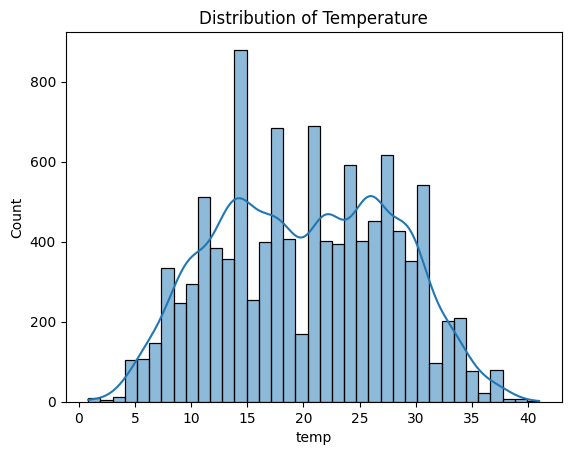

In [ ]:
# Plot distributions of continuous variables
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

**Temperature influences rental behavior; higher or lower temperatures may lead to decreased rentals.**

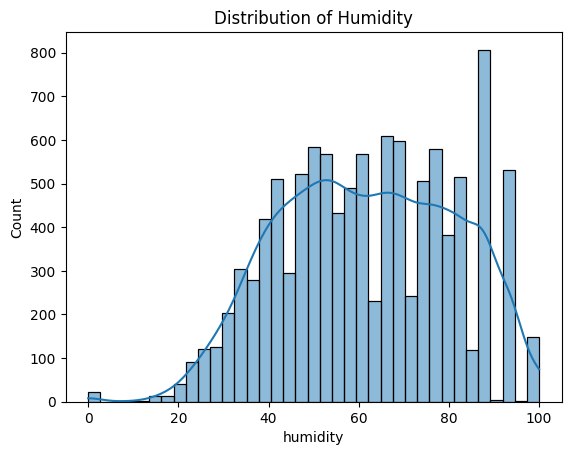

In [ ]:
sns.histplot(df['humidity'], kde=True)
plt.title('Distribution of Humidity')
plt.show()

**Low humidity can deter bike rentals, while medium to high humidity (40-90) might encourage them.**

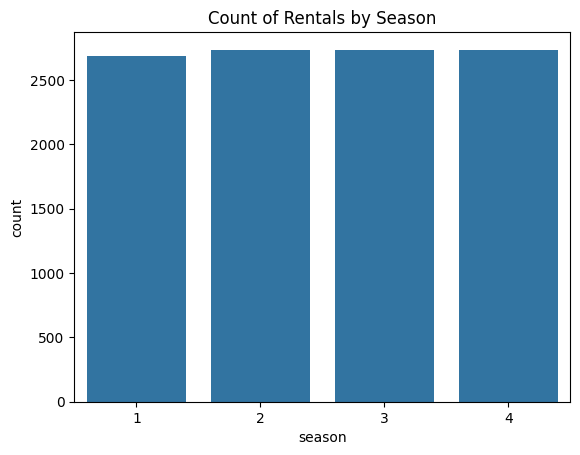

In [ ]:
# Plot barplots/countplots for categorical variables
sns.countplot(x='season', data=df)
plt.title('Count of Rentals by Season')
plt.show()

**From the plot we interpret that season does not effect the bike rentals much.**

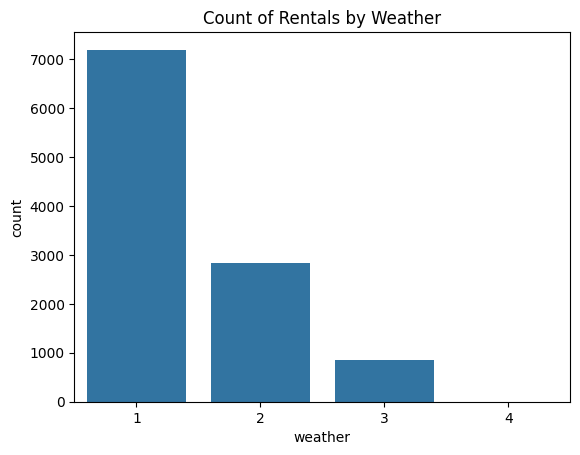

In [ ]:
sns.countplot(x='weather', data=df)
plt.title('Count of Rentals by Weather')
plt.show()

**From the above plot we can see that there is very significant impact of weather on bike rentals.**

# **Bivariate Analysis**

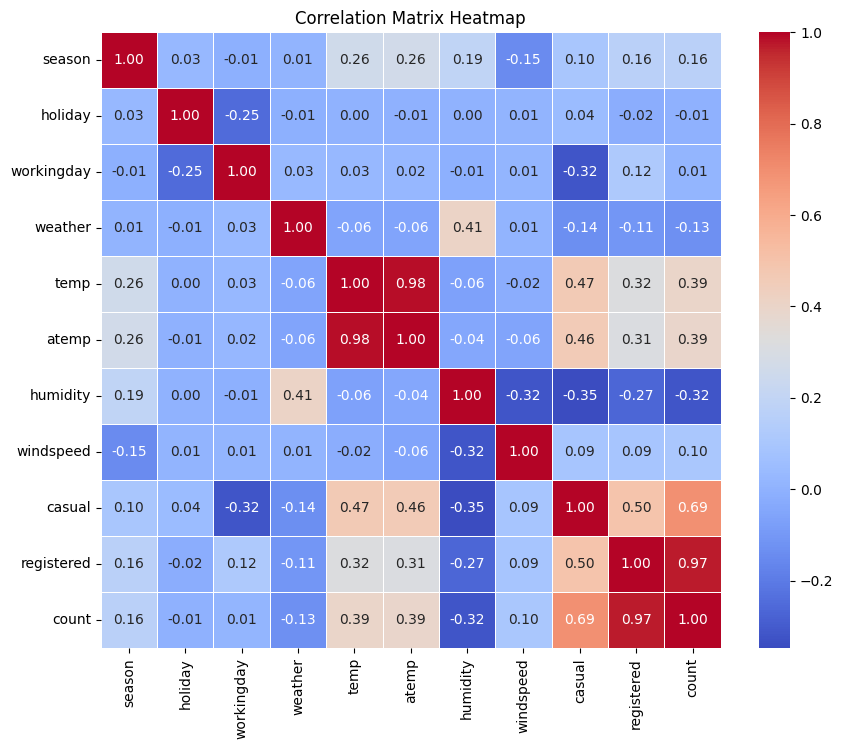

In [ ]:
df1= df.drop(columns=['datetime'])
correlation_matrix = df1.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

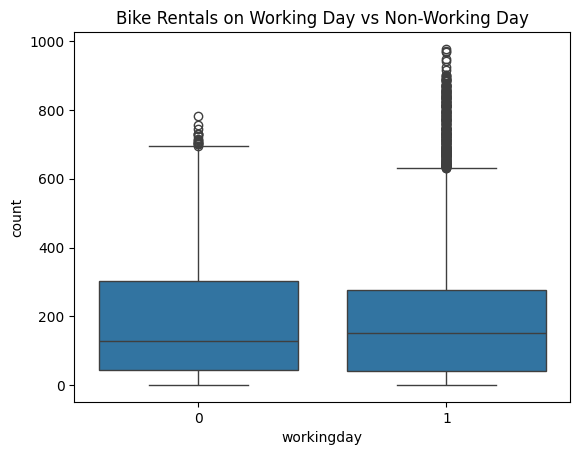

In [ ]:
# Relationship between working day and count
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Bike Rentals on Working Day vs Non-Working Day')
plt.show()

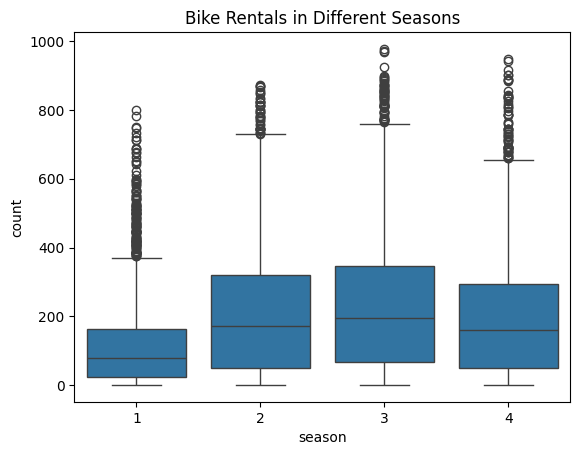

In [ ]:
# Relationship between season and count
sns.boxplot(x='season', y='count', data=df)
plt.title('Bike Rentals in Different Seasons')
plt.show()


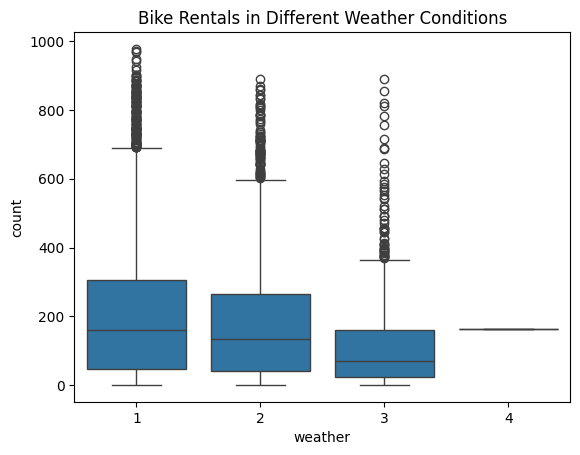

In [ ]:
# Relationship between weather and count
sns.boxplot(x='weather', y='count', data=df)
plt.title('Bike Rentals in Different Weather Conditions')
plt.show()


# **2-Sample T-Test**
# **Difference in Bike Rentals Between Weekdays and Weekends:**

  ***Null Hypothesis (H0):*** There is no significant difference in bike rentals between weekdays and weekends.

  ***Alternative Hypothesis (H1):*** Bike rentals differ significantly between weekdays and weekends.


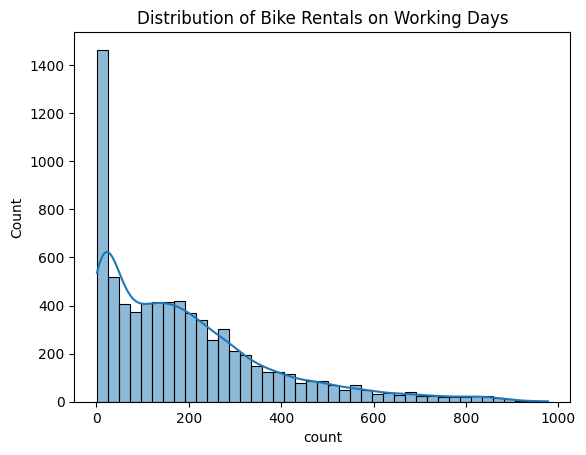

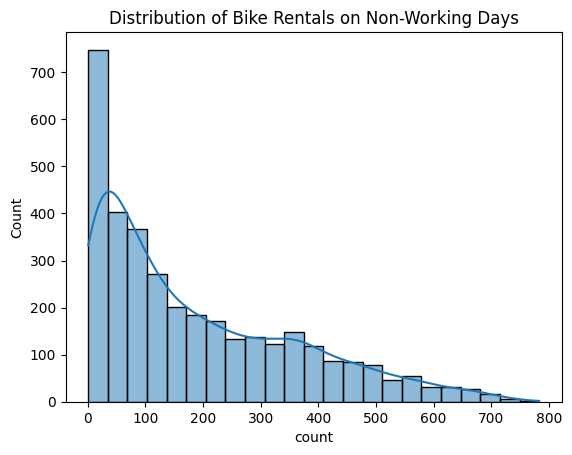

Levene's test result: LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)
Two-Sample T-Test Results:
T-statistic: 1.2096277376026694
P-value: 0.22644804226361348

Fail to reject null hypothesis: There is no significant difference in bike rentals between weekdays and weekends.


In [ ]:
# Split data into two groups: working day and non-working day
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Histogram and Q-Q plots for normality check
sns.histplot(working_day, kde=True)
plt.title('Distribution of Bike Rentals on Working Days')
plt.show()

sns.histplot(non_working_day, kde=True)
plt.title('Distribution of Bike Rentals on Non-Working Days')
plt.show()

# Levene’s test for equal variances
levene_test = stats.levene(working_day, non_working_day)
print(f"Levene's test result: {levene_test}")

# Perform independent 2-sample t-test
t_stat, p_value = stats.ttest_ind(working_day, non_working_day)

# Set significance level
alpha = 0.05

print(f'Two-Sample T-Test Results:')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
if p_value < alpha:
    print('\nReject null hypothesis: There is a significant difference in bike rentals between weekdays and weekends.')
else:
    print('\nFail to reject null hypothesis: There is no significant difference in bike rentals between weekdays and weekends.')

**Working Day**

**P-value:** 0.2264

**Insight:** Since the p-value is greater than 0.05, the working day status is not a significant predictor of bike demand. There is no significant difference in bike rentals between working days and non-working days.


# **ANOVA**
# **Impact of Weather on Bike Rentals:**

  ***Null Hypothesis (H0):*** Weather conditions do not significantly affect the number of bike rentals.

  ***Alternative Hypothesis (H1):*** Weather conditions significantly affect the number of bike rentals.


In [ ]:
# Ensure weather categories are correctly labeled
df['weather'] = df['weather'].replace({1: 'Clear', 2: 'Rainy', 3: 'Snow'})
# Group data by weather categories
clear = df[df['weather'] == 'Clear']['count']
rainy = df[df['weather'] == 'Rainy']['count']
snow = df[df['weather'] == 'Snow']['count']

levene_test = stats.levene(clear, rainy, snow)
print(f"Levene's test result: {levene_test}")

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(clear, rainy, snow)

print("ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Set significance level
alpha = 0.05

if p_value < alpha:
    print("\nReject the null hypothesis. Weather conditions significantly affect bike rentals.")
else:
    print("\nFail to reject the null hypothesis. Weather conditions do not significantly affect bike rentals.")

Levene's test result: LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)
ANOVA Results:
F-statistic: 98.28
P-value: 0.0000

Reject the null hypothesis. Weather conditions significantly affect bike rentals.



**Weather Conditions**

**P-value:** 0.0000

**Insight:** The p-value for ANOVA is significantly less than 0.05, indicating that weather conditions have a significant effect on bike rentals.


# **Impact of Season on bike rentals:**

***Null Hypothesis (H0):*** The average number of cycles rented is the same across all seasons.

***Alternate Hypothesis (H1):***The average number of cycles rented is different across different seasons.

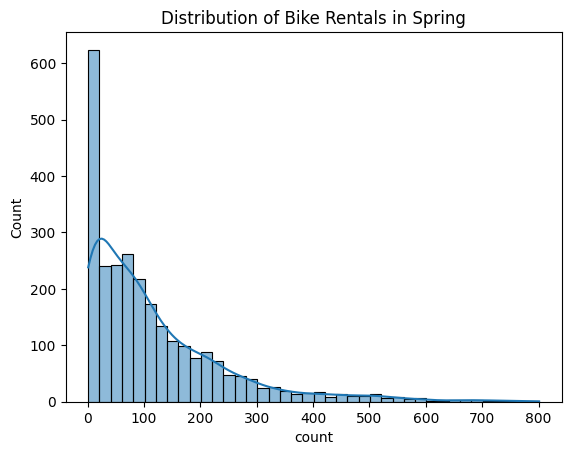

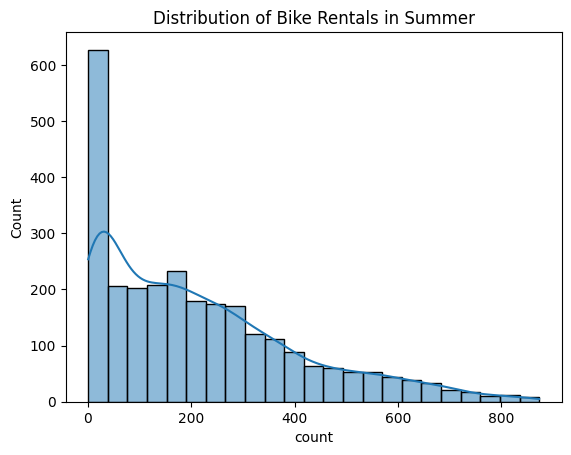

Levene's test result: LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)
ANOVA Results:
F-statistic: 236.95
P-value: 0.0000

Reject the null hypothesis. Number of cycles rented significantly differs across seasons.


In [ ]:
# Split data by season
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

# Histograms for each season
sns.histplot(spring, kde=True)
plt.title('Distribution of Bike Rentals in Spring')
plt.show()

sns.histplot(summer, kde=True)
plt.title('Distribution of Bike Rentals in Summer')
plt.show()

# Levene’s test for equal variances
levene_test = stats.levene(spring, summer, fall, winter)
print(f"Levene's test result: {levene_test}")

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(spring, summer, fall, winter)

print("ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Set significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("\nReject the null hypothesis. Number of cycles rented significantly differs across seasons.")
else:
    print("\nFail to reject the null hypothesis. Number of cycles rented does not significantly differ across seasons.")


**Season**

**P-value:** 0.0000

**Insight:** The p-value for ANOVA is much less than 0.05, suggesting that the number of cycles rented significantly differs across seasons. Again, the equal variances assumption is violated, but the season remains a significant predictor.



# **Chi-Square Test**
**Weather depends on Season:**

***Null Hypothesis (H0):***  Weather is not dependent on season.

***Alternative Hypothesis (H1):*** Weather is dependent on season.


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}")

# Decision: If p-value < alpha (0.05), reject the null hypothesis
if p_val < alpha:
    print("Reject the null hypothesis. Weather is dependent on season.")
else:
    print("Fail to reject the null hypothesis. Weather is not dependent on season.")

Chi2 Stat: 49.15865559689363, P-value: 1.5499250736864862e-07
Reject the null hypothesis. Weather is dependent on season.


**Weather vs. Season**

**P-value:** 1.5499e-07

**Insight:** The p-value is extremely small, indicating a significant dependency between weather and season. This suggests that different weather conditions are associated with specific seasons.



# **Summary of Findings:**

**Weather Conditions:**
Weather conditions are a significant predictor of bike rentals. The effect of weather on bike rentals is strong, as shown by the ANOVA results.

**Season:**
Season is also a significant predictor of bike rentals. The ANOVA results show that bike rentals differ significantly across different seasons.


**Working Day:**
Working day status is not a significant predictor of bike rentals according to the Two-Sample T-Test results.

**Weather vs. Season:**
There is a significant relationship between weather and season, indicating that certain weather conditions are more common in specific seasons.

# **How Well These Variables Describe Bike Demand:**
**Weather and Season:** Both variables significantly influence bike rentals and are crucial in describing bike demand. The strong statistical significance in ANOVA and Chi-Square tests demonstrates their importance.

**Working Day:** This variable does not significantly affect bike demand, so it is less relevant in predicting bike rentals.

# **Recommendations:**

**Adjust Bike Supply:** Provide more bikes during good weather and busy seasons, and fewer during bad weather or quiet seasons.

**Targeted Promotions:** Offer discounts during busy seasons and send reminders when the weather is nice.

**Show Weather in App:** Include weather forecasts in your app so users can plan rides better.

**Move Bikes to Better Weather Areas:** If bad weather is expected in one area, move bikes to where the weather is better.

**Don't Focus on Working Days:** Instead of focusing on weekdays or weekends, prioritize weather and season for better planning.